# Display available environmental data

Data obtained from: https://www.frontiersin.org/journals/microbiology/articles/10.3389/fmicb.2020.575194/full

In [20]:
import pandas as pd

df3 = pd.read_excel("/home/robaina/Documents/NewAtlantis/galapagos_poc/cgem_galapagos/data/Table_3.XLSX").dropna(axis=0, how='all').dropna(axis=1, how='all')
df2 = pd.read_excel("/home/robaina/Documents/NewAtlantis/galapagos_poc/cgem_galapagos/data/Table_2.XLSX", header=1).dropna(axis=0, how='all').dropna(axis=1, how='all')

In [20]:
df3.to_csv("/home/robaina/Documents/NewAtlantis/galapagos_poc/cgem_galapagos/data/Table_3.csv", index=False)
df2.to_csv("/home/robaina/Documents/NewAtlantis/galapagos_poc/cgem_galapagos/data/Table_2.csv", index=False)

## Compute average abundances among replicates

In [33]:
%%bash

python src/process_abundance_data.py \
    data/Table_2.csv \
    data/Table_3.csv \
    outputs/abundance_data_per_L.csv

Results saved to outputs/abundance_data_per_L.csv


/tmp/ipykernel_23052/1280998387.py:35: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'black'}` instead.

  ax = sns.barplot(x='Family', y='mean', hue='Year', data=df_plot,
/tmp/ipykernel_23052/1280998387.py:35: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(x='Family', y='mean', hue='Year', data=df_plot,


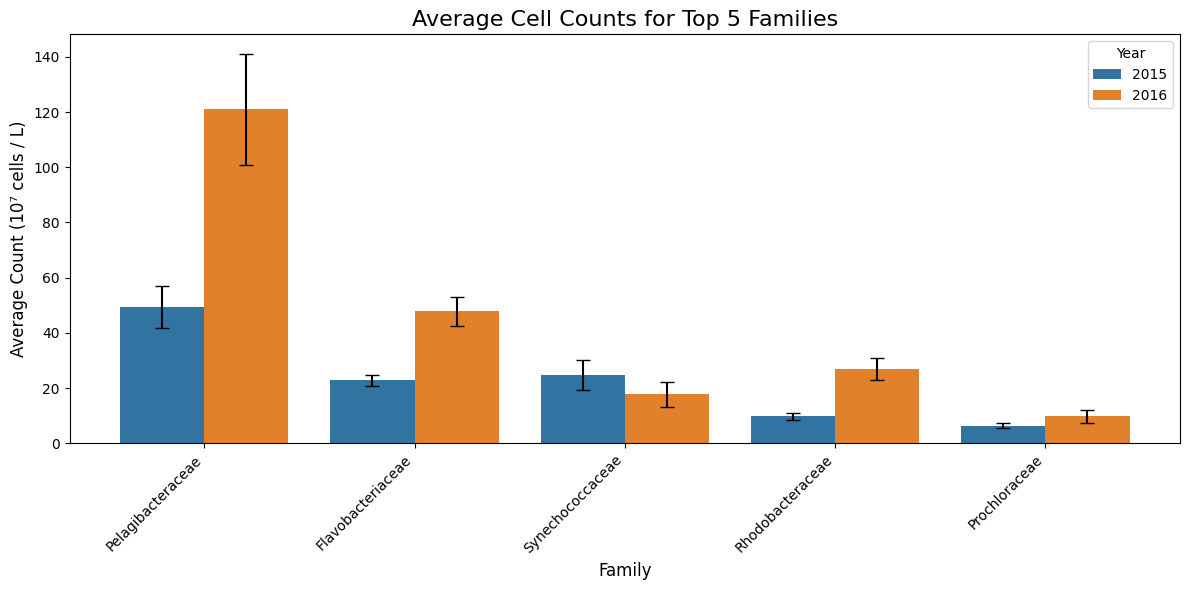

In [17]:
from src.visualization import plot_average_family_counts

plot_average_family_counts('outputs/abundance_data_per_L.csv', n=5)

/tmp/ipykernel_23052/190598856.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_23052/190598856.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_23052/190598856.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_23052/190598856.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_23052/190598856.py:41: UserWarning: set_ticklabels() shou

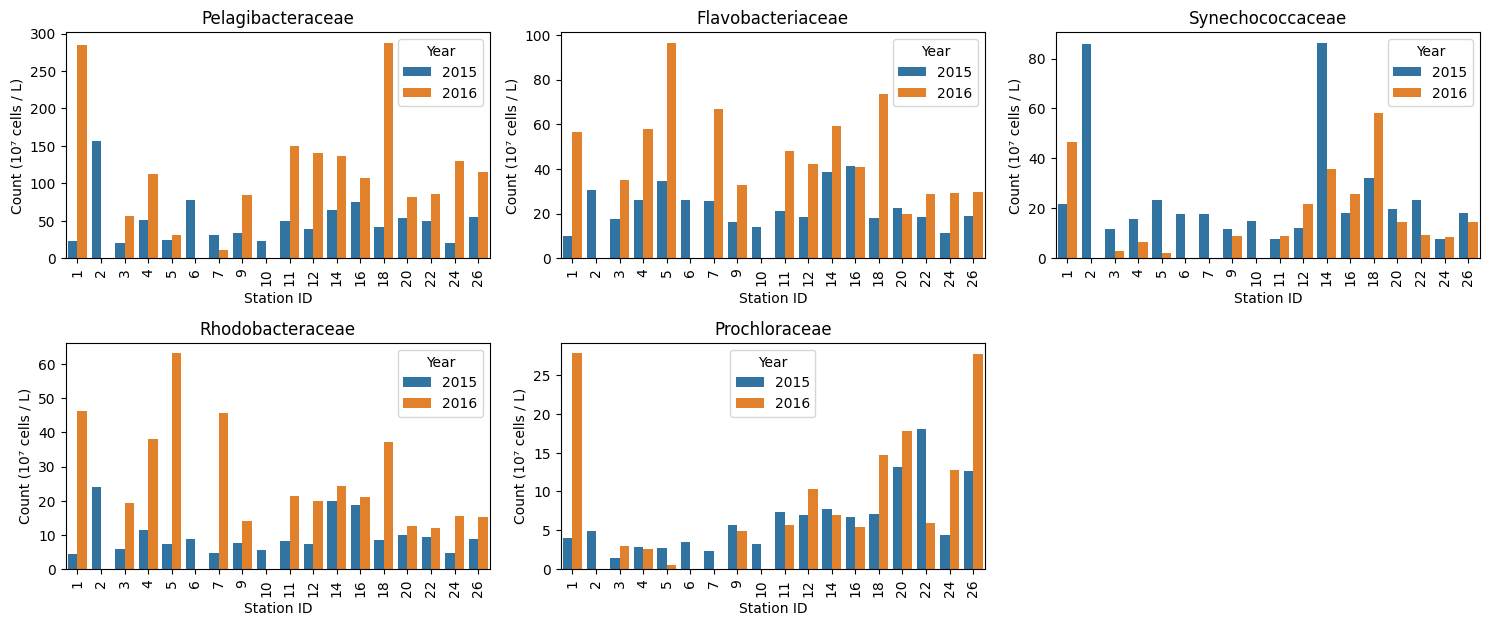

In [8]:
from src.visualization import plot_family_counts

plot_family_counts('outputs/abundance_data_per_L.csv', n=5)

## Plot environmental data

Stations are numbered following the numbers in Figure 1 of the original publication:

<div style="width:100%;text-align:center;">
    <img src="data/gifford/stations_data_galapagos.jpg" width="40%">
</div>

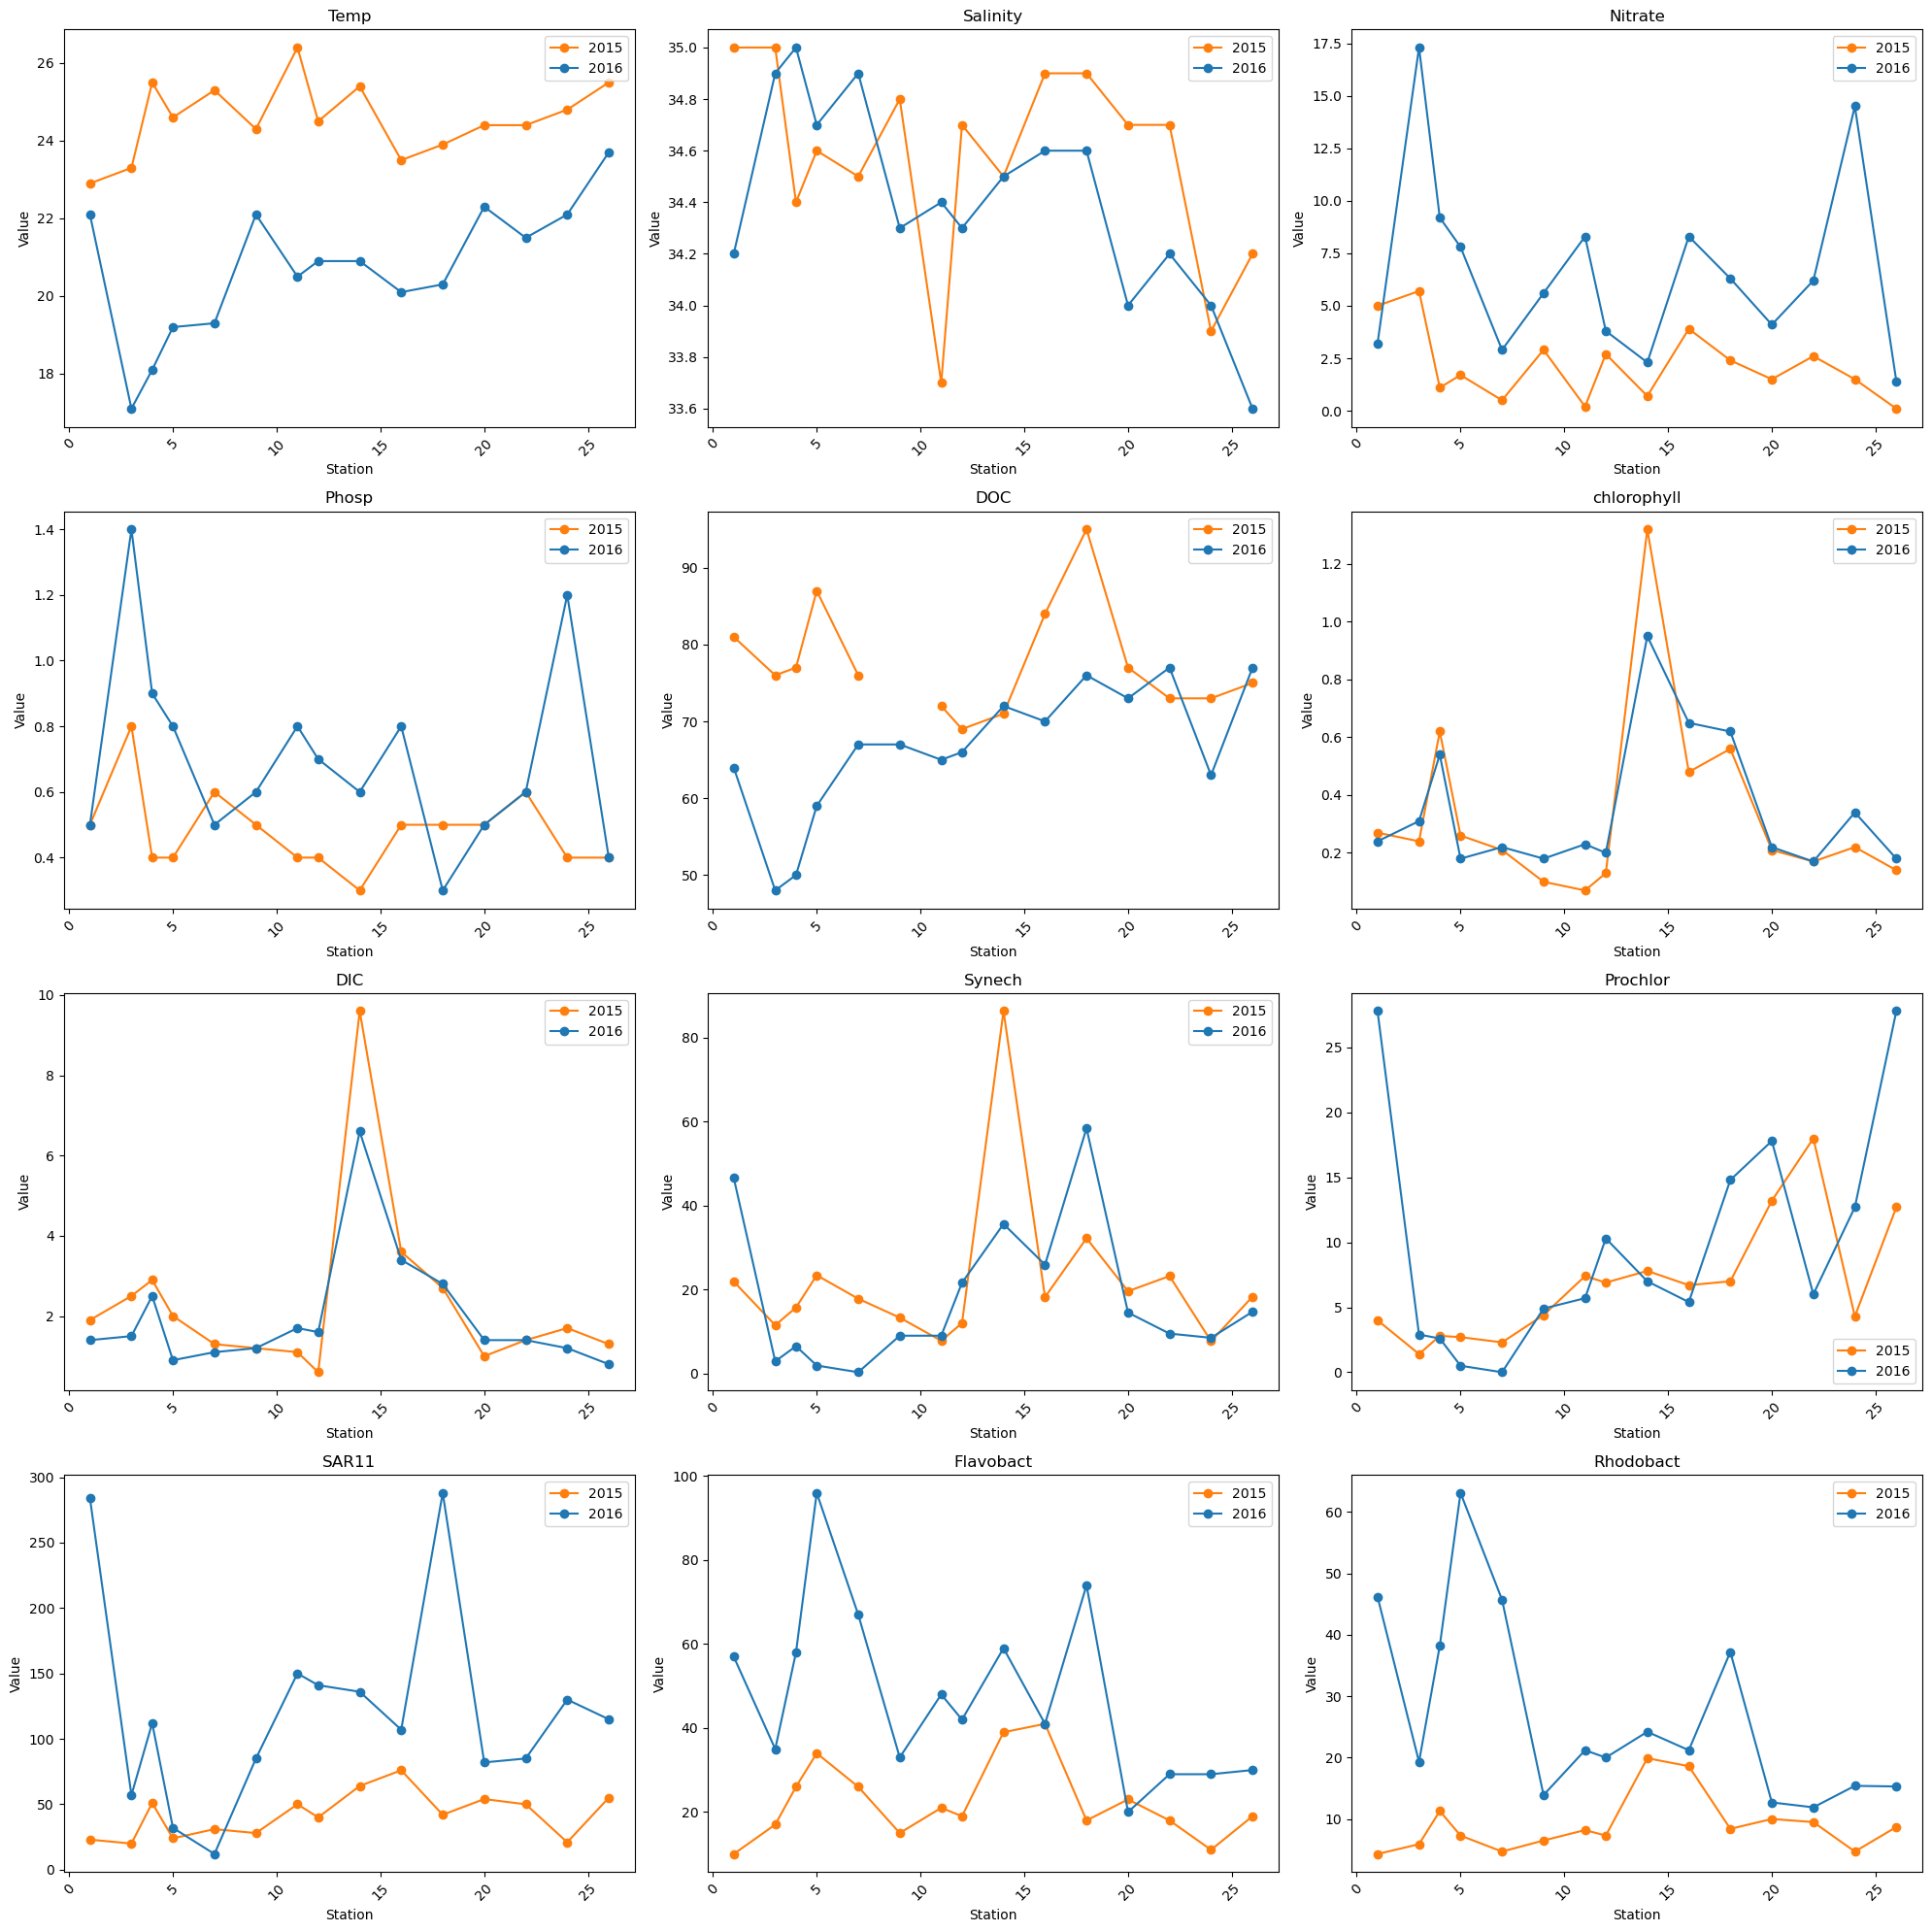

In [37]:
from src.visualization import plot_environmental_variables

file_path = 'data/gifford/galapagos_metadata_figure1.tsv'
plot_environmental_variables(file_path)

## Clean abundance data for cGEM

In [1]:
import pandas as pd 

df = pd.read_csv('data/gifford/abundance_data_per_L.csv').set_index("Family")
n = 5
abu2015 = df.loc[:, [c for c in df.columns if '2015' in c]].iloc[:n, :]
abu2016 = df.loc[:, [c for c in df.columns if '2016' in c]].iloc[:n, :]

model_ids = ["pelagibacter", "polaribacter", "synechococcus", "roseobacter", "prochlorococcus"]

relabu2015 = abu2015.div(abu2015.sum(axis=0), axis=1)
relabu2016 = abu2016.div(abu2016.sum(axis=0), axis=1)

relabu2015.insert(0, 'model_id', model_ids)
relabu2016.insert(0, 'model_id', model_ids)

relabu2015.to_csv("data/gifford/relative_abundance_2015.tsv", sep="\t")
relabu2016.to_csv("data/gifford/relative_abundance_2016.tsv", sep="\t")

relabu2015

,model_id,station_1_2015,station_2_2015,station_3_2015,station_4_2015,station_5_2015,station_6_2015,station_7_2015,station_9_2015,station_10_2015,station_11_2015,station_12_2015,station_14_2015,station_16_2015,station_18_2015,station_20_2015,station_22_2015,station_24_2015,station_26_2015
Family,,,,,,,,,,,,,,,,,,,
Pelagibacteraceae,pelagibacter,0.359867,0.518295,0.358698,0.478018,0.261016,0.580756,0.381236,0.447231,0.378441,0.529429,0.469869,0.296386,0.471836,0.388728,0.452238,0.419691,0.428781,0.482228
Flavobacteriaceae,polaribacter,0.157932,0.101184,0.308335,0.244592,0.374868,0.193729,0.316161,0.220303,0.229351,0.224854,0.219727,0.178257,0.256721,0.167921,0.189217,0.154038,0.228683,0.166933
Synechococcaceae,synechococcus,0.349722,0.284376,0.204091,0.145848,0.255324,0.134235,0.217462,0.155939,0.248483,0.081926,0.142410,0.397814,0.113415,0.299942,0.164355,0.195100,0.157830,0.161941
Rhodobacteraceae,roseobacter,0.068360,0.079809,0.104025,0.105373,0.079486,0.065077,0.056941,0.100095,0.090994,0.086076,0.086128,0.091710,0.116391,0.077784,0.084009,0.079855,0.095773,0.076877
Prochloraceae,prochlorococcus,0.064119,0.016336,0.024852,0.026169,0.029306,0.026203,0.028200,0.076432,0.052730,0.077715,0.081865,0.035834,0.041638,0.065624,0.110181,0.151316,0.088932,0.112021


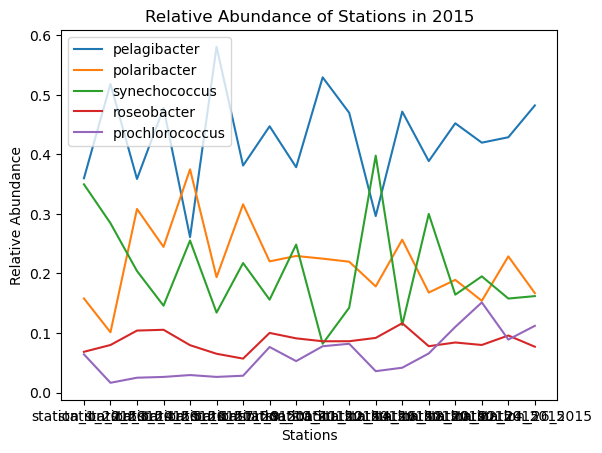

In [14]:
import matplotlib.pyplot as plt

# Plotting all stations in relabu2015
for i in range(len(relabu2015)):
    plt.plot(relabu2015.columns[1:], relabu2015.iloc[i, 1:], label=relabu2015.iloc[i, 0])

# Adding legend and labels
plt.legend()
plt.xlabel('Stations')
plt.ylabel('Relative Abundance')
plt.title('Relative Abundance of Stations in 2015')

# Display the plot
plt.show()

## Obtain station coordinates

In [19]:
import pandas as pd
import re

def convert_coordinates(coord):
    # Convert coordinates in the format "1.09 S 91.09 W" to decimal format
    try:
        parts = re.split(r'\s+', coord.strip())
        if len(parts) != 4:
            raise ValueError("Incorrect coordinate format")
        
        lat_str = parts[0] + " " + parts[1]
        lon_str = parts[2] + " " + parts[3]

        lat_val = float(lat_str[:-2].strip())
        lon_val = float(lon_str[:-2].strip())
        
        lat_dir = lat_str[-1]
        lon_dir = lon_str[-1]

        if lat_dir in ['S', 's']:
            lat_val = -lat_val
        if lon_dir in ['W', 'w']:
            lon_val = -lon_val

        return lat_val, lon_val
    except Exception as e:
        print(f"Error parsing coordinates '{coord}': {e}")
        return None, None

def extract_and_convert_coordinates(file_path, output_file_path):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')
    
    # Dictionary to hold one coordinate per station
    station_coords = {}
    
    # Extract station number and coordinates, converting to decimal format
    for index, row in df.iterrows():
        station = row['Station']
        lat_lon = row['lat_lon']
        lat, lon = convert_coordinates(lat_lon)
        if lat is not None and lon is not None:
            if station not in station_coords:
                station_coords[station] = (lat, lon)
    
    # Convert the dictionary to a DataFrame and sort by station number
    extracted_data = [[station, coords[0], coords[1]] for station, coords in station_coords.items()]
    extracted_df = pd.DataFrame(extracted_data, columns=['Station', 'Latitude', 'Longitude'])
    extracted_df.sort_values(by='Station', inplace=True)
    
    # Save the new DataFrame to a TSV file
    extracted_df.to_csv(output_file_path, sep='\t', index=False)
    print(f"Extracted coordinates saved to {output_file_path}")

# Example usage
file_path = 'data/gifford/sample_coordinates.tsv'
output_file_path = 'data/gifford/station_coordinates.tsv'
extract_and_convert_coordinates(file_path, output_file_path)

Extracted coordinates saved to data/gifford/station_coordinates.tsv
